# 贪心算法

贪心算法（又称贪婪算法）是指，在对问题求解时，总是做出在当前看来是最好的选择。也就是说，不从整体最优上加以考虑，他所做出的是在某种意义上的局部最优解。

通俗一点讲，当要解决某一个问题时，先判断第一步的最优解，然后把剩下的步骤看作下一个递归的具体问题。

##### 例子

如0-1背包问题：给定n种物品和一个背包。物品i的重量是Wi，其价值为Vi，背包的容量为C。应如何选择装入背包的物品，使得装入背包中的物品的总价值最大？

假设具体问题数值：

    A物品，重量为6kg，价值为8元，

    B物品，重量为8kg，价值为13元，

    C物品，重量为10kg，价值为15元





背包可以装为50kg的物品。

有经验的小朋友肯定首先判断拿取哪一个物品既轻又有价值。

    A物品：单位重量的价值为8/6（元）

    B物品：单位重量的价值为13/8（元）

    C物品：单位重量的价值为15/10（元）
    
计算看出，只要能装，首先要拿B物品，因为单位价值最高。

即剩余50kg

第一步：我有 50 kg背包，我可以选择的物品有 A，B，C

第二步：选择当前这一步最优解，即 B。而问题的背包变成50-8=42kg，而问题只有背包重量改变，重新回到第一步判断。

所以就是：（选择优先B，然后C，然后A）

1：我有  50kg  背包，我可以选择A，B，C，总价值为0    ，我选择B

2：我有  42kg  背包，我可以选择A，B，C，总价值为13  ，我选择B

3：我有  34kg  背包，我可以选择A，B，C，总价值为26  ，我选择B

4：我有  26kg  背包，我可以选择A，B，C，总价值为39  ，我选择B

5：我有  18kg  背包，我可以选择A，B，C，总价值为52  ，我选择B

6：我有  10kg  背包，我可以选择A，B，C，总价值为65  ，我选择B

7：我有  2kg    背包，我可以选择               ，总价值为78  ，没有空间选了



这时候有眼尖的小朋友就问了：“那这道题这样做的话，只能取6个B物品，重量为48kg，总价值为6*13=78元。那如果我取5个B物品，1个C物品，不是刚好50kg吗？这样总价值有5*13+15=80元呢”。其实这就看出，贪心算法得到的并不是最优解。

In [2]:
# coding=utf-8
if __name__ == '__main__':
    beg = 50                       #背包50kg
    value = 0                      #已经获得的价值
    choice = []
    while beg > 0:                 #如果背包还有空位，则递归
        if beg >= 8:               #选择当前这一步的最优解，既选择B商品
            beg = beg - 8
            value = value + 13
            choice.append("B")
        elif beg >= 10:            #要是B商品选择不了，则选择第二单位价值的物品，即A物品
            beg = beg - 10
            value = value + 15
            choice.append("A")
        elif beg >= 6:
            beg = beg - 6
            value = value + 8
            choice.append("C")
        else:                      #当所有的物品都选择不了，则退出
            break
    print("剩余的背包重量：",beg)
    print("获得的总价值：",value)
    print("选择的物品的类型及顺序：",choice)



剩余的背包重量： 2
获得的总价值： 78
选择的物品的类型及顺序： ['B', 'B', 'B', 'B', 'B', 'B']


# 动态规划

### 1. 最优子结构

好像贪心一样，动态规划也是把一个复杂问题分成一个一个步骤，而与贪心不一样的是，贪心是保证当前这一步是当前问题的最优解，而不保证这一步属于整个复杂问题的最优解。而最优子结构就是要规定当前这一步是整个复杂问题的最优解。（区别可参考一开始那个背包问题，最后一步究竟取B，还是取A。）

### 2. 子问题重叠

子问题重叠在贪心也需要体现，走每一步面对的问题都是同一个类型的，例如背包问题的子问题就是：当前我的背包有Xkg空间，我能选择XXX。例如在金矿问题的子问题就是：当前我有X人，XXX剩余金矿。

### 3. 边界

边界体现在背包没有空间，或者金矿没有足够人数取挖。

### 4. 子问题独立

子问题即上面走的每一步之间没有干扰（互不影响）

##### 例题：斐波那契数列之青蛙跳台阶。

一只青蛙一次可以跳上 1 级台阶，也可以跳上2 级。求该青蛙跳上一个n 级的台阶总共有多少种跳法。

In [4]:
# coding=utf-8
def fib(n):          #当前有N个台阶，可以选择跳一个台阶，也可以选择跳两个
    if n <=1 :       #边界问题，要是当前只剩下一个台阶，则只剩下一个方法跳。
        return 1
    else:            #跳一个台阶和跳两个台阶都是一个选项。
        return fib(n-1)+fib(n-2)
print(fib(5))


8


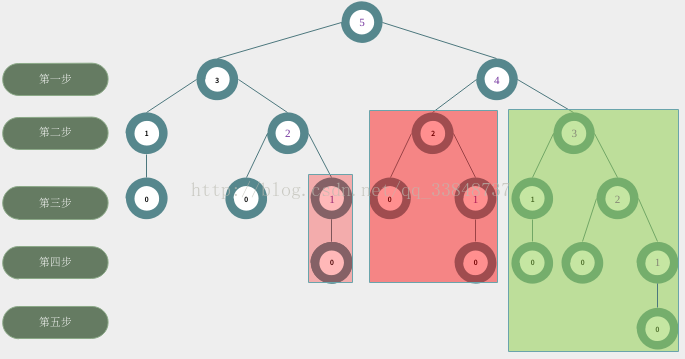

In [9]:
class Dp1(object):                                     #动态规划类
    def __init__(self,n):                              #初始化
        self.mark = [0 for _ in range(n+1)]            #定义一个一维数组，初始化全部为0，长度为台阶数。用来当作“备忘录”。
        print(self.dp(n))                              #开始递归
    def dp(self,n):                                    #递归的方法
        self.m = 0                                     #m的含义是当前n个台阶有m种跳法
        if self.mark[n] != 0:                          #先从备忘录寻找n，若存在mark[n]不等于0,则代表曾经计算过，n个台阶有mark[n]种跳法
            self.m = self.mark[n]                      #若备忘录有，则直接得到n层台阶的答案
        elif n <= 0:                                   #从这里开始的四行是用来判断“边界问题”
            if n == 0:                                 #若刚好跳完台阶，则这样算一种方法
                self.m = 1                             #m变成1,代表是一种可行方法
            else:                                      #有可能跳的台阶超过实际台阶数
                self.m = 0                             #m为0,代表不可行
        elif n>0:                                      #这里两行是用于规划转移方程式（其实这里很简单），青蛙只有两种可能，跳一层或者跳两层。
            self.m = self.dp(n-2)+self.dp(n-1)         #当前n层台阶的解个数 等于 n-1层台阶的解 + n-2层台阶的解
        self.mark[n] = self.m                          #把m放入备忘录，下次若是再次是n层台阶，则不用计算直接取备忘录的数。（优化）
        return self.m                                  #返回
 
if __name__ == '__main__':
    dp1 = Dp1(0)


1


所以其实一开始没有写错，是6个思考点，是经过优化的6个思考点，第五步是做备忘录，第六步是时间分析。
总结步骤的话，根据博客作者的话来说，就是：

       1、构造问题所对应的过程。

       2、思考过程的最后一个步骤，看看有哪些选择情况。

       3、找到最后一步的子问题，确保符合“子问题重叠”，把子问题中不相同的地方设置为参数。

       4、使得子问题符合“最优子结构”。

       5、找到边界，考虑边界的各种处理方式。

       6、确保满足“子问题独立”，一般而言，如果我们是在多个子问题中选择一个作为实施方案，而不会同时实施多个方案，那么子问题就是独立的。

       7、考虑如何做备忘录。

       8、分析所需时间是否满足要求。

       9、写出转移方程式。



# 例题

#### 1. 硬币找零

假设有几种硬币，如1、3、5，并且数量无限。请找出能够组成某个数目的找零所使用最少的硬币数。 

In [11]:

# coding=utf-8
class Dp2:
    def __init__(self,money):
        self.mark = [0 for _ in range(money+1)]                   #备忘录
        print(self.dp(money))                                      #开始递归
    def dp(self,money):  
        self.coin = 0                                              #需要的硬币数为0
        if self.mark[money] != 0:                                  #在备忘录中寻找该金额下的最少硬币找零数，若存在，则取出
            self.coin = self.mark[money]
        elif money <= 0:                                           #边界问题
            if money == 0:                                         #如果金额为零，则代表刚好算是一种找零方法
                self.coin = 0                                      #这里的0不是代表硬币数为0，而是代表这种方法可行，因为在下面已经有加1，若是这里coin为1，结果就会比答案多1
            else:
                self.coin = float("inf")                           #若是金额为负数，即“拿多了”，这种方法不可行，则硬币消耗数为 无穷大
        elif money > 0:
            self.coin = min(self.dp(money-1),self.dp(money-3),self.dp(money-5))+1     #递归，找出最少的可以凑齐金额数money的方法
        self.mark[money] = self.coin                               #做备忘录
        return self.coin
 
if __name__ == '__main__':
    dp2 = Dp2(65)               #找零钱

13


In [16]:
max(float("inf"),1)

inf

## 利用DP的笔试题

#### LIS问题 longest increasing subsequence问题

In [1]:
lis = [2 ,1, 5, 3, 6 ,4 ,8 ,9, 7]

d = [1]*len(lis)
res = 1
for i in range(len(lis)):
    for j in range(i):
        if lis[j] <= lis[i] and d[i] < d[j]+1:
            d[i] = d[j]+1
        if d[j] >  res:
            res = d[j]
print(d)


[1, 1, 2, 2, 3, 3, 4, 5, 4]


In [2]:
def lis(li):
    
    d = [1]*len(li)
    res = 1
    for i in range(len(li)):
        for j in range(i):
            if li[i]>li[j]:
                d[i] = max(d[i], d[j]+1)
            if d[i] > res: res = d[i]
                
    return res


li = [2 ,1, 5, 3, 6 ,4 ,8 ,9, 7]
print(lis(li))


5


#### LCS问题(最长公共子序列)

首先需要科普一下，最长公共子序列（longest common sequence）和最长公共子串（longest common substring）不是一回事儿。什么是子序列呢？即一个给定的序列的子序列，就是将给定序列中零个或多个元素去掉之后得到的结果。什么是子串呢？给定串中任意个连续的字符组成的子序列称为该串的子串。给一个图再解释一下：
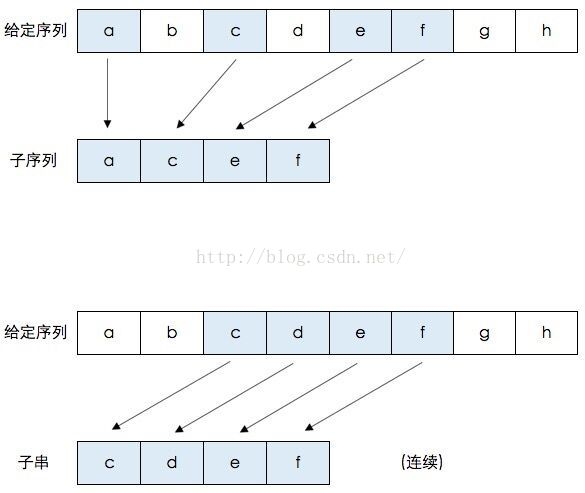

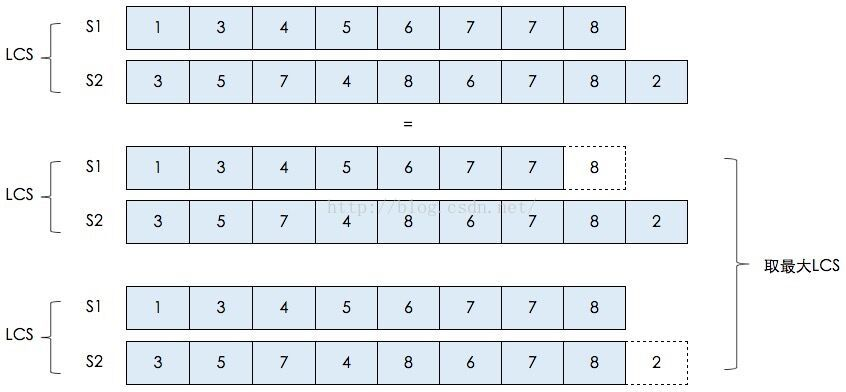

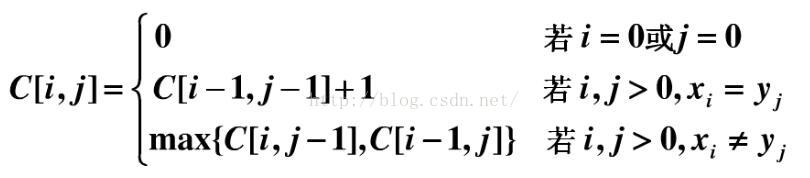

In [24]:
# 根据图解教程写的伪代码，其实最后评论里面的代码就是我添加上去的

s1 = [1,3,4,5,6,7,7,8]
s2 = [3,5,7,4,8,6,7,8,2]

d = [[0]*(len(s2)+1) for i in range(len(s1)+1) ]

for i in range(1,len(s1)+1):
    for j in range(1,len(s2)+1):
        if s1[i-1] == s2[j-1]:
            d[i][j] = d[i-1][j-1]+1
        else:
            d[i][j] = max(d[i-1][j],d[i][j-1])


print("max LCS number:",d[-1][-1])


max LCS number: 5


#### 给定一个有n个正整数的数组A和一个整数sum


​ 给定一个有n个正整数的数组A和一个整数sum,求选择数组A中部分数字和为sum的方案数。 
当两种选取方案有一个数字的下标不一样,我们就认为是不同的组成方案。

In [29]:
sum_ = 10
line = [5 ,5 ,10 ,2 ,3] 

def ls_sum(li, sum):
    
    dp_ls = [[1]+[0]*sum for i in range(len(line))]
    

    for i in range(len(line)):
        for j in range(1, sum+1):
            
            # whether choose line[j] or not
            if li[i] < j
                dp_ls[i][j] = dp_ls[i-1][j]
    
    
    

SyntaxError: invalid syntax (<ipython-input-29-d2ec7cad8765>, line 13)

In [27]:
[1]+[0]*10

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]